In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("data.csv", encoding_errors = "ignore")

In [3]:
def deta_quality_check(data):
    print("Data Head ", data.head())
    print("Data Inconsistancy check ", data.dtypes)
    print("Data Null check ", data.isnull().sum())
    print("Data information check ", data.info())
    print("Data description check ", data.describe())
    print("Data Tail ", data.tail())

In [4]:
print(deta_quality_check(data))

Data Head     PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
Data Inconsistancy check  PassengerId      int64
Survived         int64
Pcl

In [5]:
data["Age"].fillna(data["Age"].mean(), inplace = True)
data["Fare"].fillna(data["Fare"].mean(), inplace = True)
data["Cabin"].fillna(data["Cabin"].mode()[0], inplace = True)

In [6]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:

from sklearn.preprocessing import LabelEncoder, StandardScaler
def preprocessing(data):
    # separating numerical and categorical features
    encoder = LabelEncoder()
    scaler = StandardScaler()
    categorical_data, numerical_data = [], []
    for col in data.columns:
        if data[col].dtypes == "object":
            categorical_data.append(col)
            # Encoding the categorical data
            data[col] = encoder.fit_transform(data[col])
        else:
            numerical_data.append(col)
        # Feature Scaling. Applying std () for all    
    # scaled_data = scaler.fit_transform(data)
    return  data

## **Train Test Split**

In [8]:
scaled_data = preprocessing(data)

In [9]:
scaled_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,206,1,34.50000,0,0,152,7.8292,15,1
1,893,1,3,403,0,47.00000,1,0,221,7.0000,15,2
2,894,0,2,269,1,62.00000,0,0,73,9.6875,15,1
3,895,0,3,408,1,27.00000,0,0,147,8.6625,15,2
4,896,1,3,178,0,22.00000,1,1,138,12.2875,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,353,1,30.27259,0,0,267,8.0500,15,2
414,1306,1,1,283,0,39.00000,0,0,324,108.9000,22,0
415,1307,0,3,332,1,38.50000,0,0,346,7.2500,15,2
416,1308,0,3,384,1,30.27259,0,0,220,8.0500,15,2


In [10]:
scaled_df = pd.DataFrame(scaled_data, columns = data.columns)

In [11]:
# Creating features and Target
X = scaled_df.drop(["Survived"], axis = 1)
y = scaled_df["Survived"]

In [12]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,206,1,34.50000,0,0,152,7.8292,15,1
1,893,3,403,0,47.00000,1,0,221,7.0000,15,2
2,894,2,269,1,62.00000,0,0,73,9.6875,15,1
3,895,3,408,1,27.00000,0,0,147,8.6625,15,2
4,896,3,178,0,22.00000,1,1,138,12.2875,15,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,353,1,30.27259,0,0,267,8.0500,15,2
414,1306,1,283,0,39.00000,0,0,324,108.9000,22,0
415,1307,3,332,1,38.50000,0,0,346,7.2500,15,2
416,1308,3,384,1,30.27259,0,0,220,8.0500,15,2


In [13]:
X.shape

(418, 11)

In [14]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [15]:
y.shape

(418,)

In [16]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2)

In [17]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
346,1238,2,39,1,26.00000,0,0,67,13.0000,15,2
71,963,3,263,1,21.00000,0,0,194,7.8958,15,2
160,1052,3,350,0,30.27259,0,0,161,7.7333,15,1
219,1111,3,374,1,30.27259,0,0,148,8.0500,15,2
212,1104,2,107,1,17.00000,0,0,333,73.5000,15,2
...,...,...,...,...,...,...,...,...,...,...,...
126,1018,3,47,1,22.00000,0,0,210,7.7958,15,2
354,1246,3,108,0,0.17000,1,2,280,20.5750,15,2
393,1285,2,155,1,47.00000,0,0,282,10.5000,15,2
35,927,3,203,1,18.50000,0,0,115,7.2292,15,0


In [18]:
X_train.shape, X_test.shape

((334, 11), (84, 11))

In [19]:
y_train.shape, y_test.shape

((334,), (84,))

In [20]:
data.shape

(418, 12)

In [21]:
y_train.values

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Starting Training
model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
model

LogisticRegression()

In [24]:
# These are the actual test labels
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [25]:
# These are the predicted test labels
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [26]:
predicted_data = pd.DataFrame(y_test.values,model.predict(X_test))

In [27]:
predicted_data.reset_index(inplace = True)

In [28]:
columns = ["Actual_Survived", "Predicted_survived"]
predicted_data.columns = columns

In [29]:
predicted_data

,Actual_Survived,Predicted_survived
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
79,0,0
80,1,1
81,0,0
82,1,1


### **Classification Performence Metrics**



## **1.Accuracy**

In [30]:
from sklearn.metrics import accuracy_score
acc_of_model = accuracy_score(predicted_data["Actual_Survived"],predicted_data["Predicted_survived"])
print("The acccuracyb of the model is ", acc_of_model)

The acccuracyb of the model is  1.0


## **2.Confusion Matrix**

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion_matrix_result = confusion_matrix(predicted_data["Actual_Survived"],predicted_data["Predicted_survived"])

In [32]:
print(confusion_matrix_result)

[[53  0]
 [ 0 31]]


<Axes: >

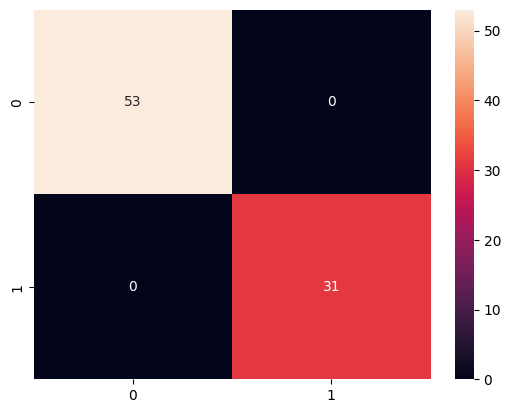

In [33]:
sns.heatmap(confusion_matrix_result, annot = True)

## **3.Classification Report**

In [34]:
classification_report_result = classification_report(predicted_data["Actual_Survived"],
                                                     predicted_data["Predicted_survived"])
print("The classificaiton report for actual target and predicted target is: \n", classification_report_result)

The classificaiton report for actual target and predicted target is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [35]:
from yellowbrick.classifier import ClassificationReport

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


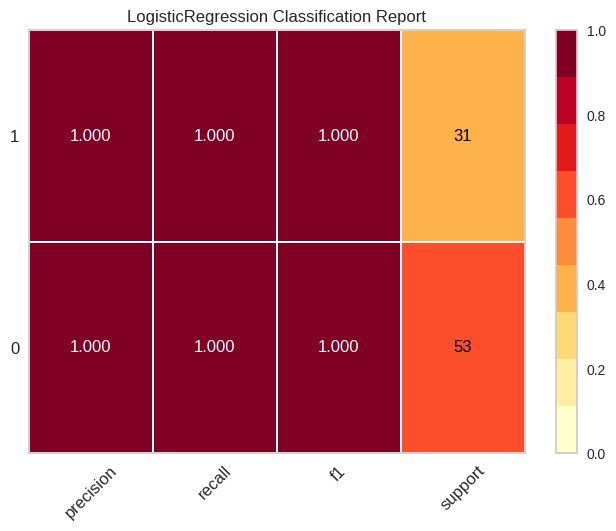

<Figure size 1500x800 with 0 Axes>

In [36]:
# model = GaussianNB()
classes = [0,1]
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data

plt.figure(figsize = [15,8])
visualizer.show()                       # Finalize and show the figure
plt.show();

### **Hyperparameter Tuning**

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty':["l1", "l2", "elasticnet", None],
              'dual':[True,False]}

In [39]:
grid_search = GridSearchCV(model,param_grid)

In [40]:
grid_search

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'dual': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [41]:
# Begin Hyperparameter Tuning
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'dual': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [43]:
best_parameters = grid_search.best_params_

In [44]:
best_parameters

{'dual': False, 'penalty': 'l2'}

In [48]:
best_model = LogisticRegression(penalty = "l2", dual= False)

In [49]:
# Train the best model with the data
best_model.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
best_predictions = best_model.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
acc_of_best_model = accuracy_score(predicted_data["Actual_Survived"],best_predictions)
print("The acccuracyb of the model before tuning is ", acc_of_model)
print("The acccuracyb of the model after tuning is ", acc_of_best_model)

The acccuracyb of the model before tuning is  1.0
The acccuracyb of the model after tuning is  1.0


In [53]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'penalty':["l1", "l2", "elasticnet", None],
              'dual':[True,False]}
random_search = RandomizedSearchCV(model,param_grid)

# Begin Hyperparameter Tuning with RandomSearchCV
random_search.fit(X_train, y_train)

best_parameters_random_search = random_search.best_params_
print("Best params on Random Search CV is:", best_parameters_random_search)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


Best params on Random Search CV is: {'penalty': 'l2', 'dual': False}


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [54]:
print("Best params on Random Search CV is:", best_parameters_random_search)

Best params on Random Search CV is: {'penalty': 'l2', 'dual': False}


In [57]:
best_model_randomsearch = LogisticRegression(penalty = "l2", dual= False)

# Training with RandomSearch best params
best_model_randomsearch.fit(X_train,y_train)

# Making predictions with the RandomSearch best params
best_predictions_randomsearch = best_model_randomsearch.predict(X_test)

from sklearn.metrics import accuracy_score
acc_of_best_model_randomised = accuracy_score(predicted_data["Actual_Survived"],best_predictions_randomsearch)
print("The acccuracy of the model before tuning is ", acc_of_model)
print("The acccuracy of the model after tuning is ", acc_of_best_model_randomised)

The acccuracy of the model before tuning is  1.0
The acccuracy of the model after tuning is  1.0


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
